Notebook to predict Salaries

# Step 1: Import Libraries

In [64]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, Lasso




# Step 2: Load the Dataset

In [65]:

df = pd.read_csv('Salary Data.csv')  # Update this path to your dataset
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,51.0,Male,Bachelor's,Sales Director,22.0,180000.0
1,34.0,Female,Master's,Business Analyst,5.0,80000.0
2,47.0,Male,Master's,VP of Operations,19.0,190000.0
3,30.0,Male,Bachelor's,IT Support,2.0,50000.0
4,36.0,Female,Bachelor's,Recruiter,9.0,60000.0
...,...,...,...,...,...,...
351,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
352,43.0,Male,Master's,Director of Operations,19.0,170000.0
353,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
354,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


# Step 3: Data Cleaning
# Check for missing values

In [66]:

print("Missing values in each column:\n", df.isnull().sum().reset_index())


Missing values in each column:
                  index  0
0                  Age  2
1               Gender  2
2      Education Level  2
3            Job Title  2
4  Years of Experience  2
5               Salary  2


# Drop rows with any NaN values (you can also choose to fill them with a method like mean or median)


In [67]:
df.dropna(inplace=True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,51.0,Male,Bachelor's,Sales Director,22.0,180000.0
1,34.0,Female,Master's,Business Analyst,5.0,80000.0
2,47.0,Male,Master's,VP of Operations,19.0,190000.0
3,30.0,Male,Bachelor's,IT Support,2.0,50000.0
4,36.0,Female,Bachelor's,Recruiter,9.0,60000.0
...,...,...,...,...,...,...
351,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
352,43.0,Male,Master's,Director of Operations,19.0,170000.0
353,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
354,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [68]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# Step 4: Basic Data Exploration


In [69]:
print("Basic Statistics:\n", df.describe())
print("Data Types:\n", df.dtypes)

Basic Statistics:
               Age  Years of Experience         Salary
count  354.000000           354.000000     354.000000
mean    37.522599            10.125706  100919.067797
std      7.022489             6.570096   48519.325427
min     23.000000             0.000000     350.000000
25%     32.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.750000  140000.000000
max     53.000000            25.000000  250000.000000
Data Types:
 Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


# Check the distribution of the target variable


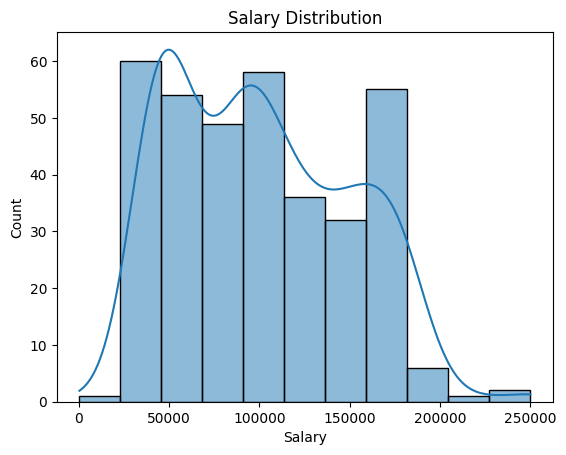

In [70]:
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

# Check the correlation matrix

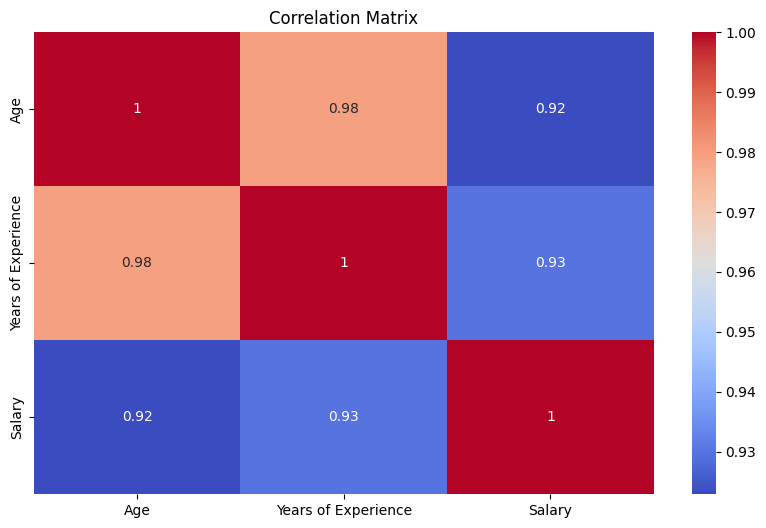

In [71]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age', 'Years of Experience', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Data Preprocessing
# Convert categorical columns to numerical values

In [72]:
label_encoders = {}
for column in ['Gender', 'Education Level', 'Job Title']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [73]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,51.0,1,0,97,22.0,180000.0
1,34.0,0,1,3,5.0,80000.0
2,47.0,1,1,165,19.0,190000.0
3,30.0,1,0,40,2.0,50000.0
4,36.0,0,0,93,9.0,60000.0
...,...,...,...,...,...,...
351,35.0,0,0,126,8.0,85000.0
352,43.0,1,1,27,19.0,170000.0
353,29.0,0,0,66,2.0,40000.0
354,34.0,1,0,132,7.0,90000.0


# Prepare the feature matrix and target vector

In [74]:

X = df.drop('Salary', axis=1)
y = df['Salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Transform your data

In [75]:
numeric_features = df[['Age', 'Years of Experience']]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(numeric_features.loc[X_train.index])
X_test_scaled = scaler.transform(numeric_features.loc[X_test.index])

In [76]:
X_train_categorical = X_train.drop(['Age', 'Years of Experience'], axis=1).reset_index(drop=True)
X_test_categorical = X_test.drop(['Age', 'Years of Experience'], axis=1).reset_index(drop=True)

In [77]:
# Convert scaled numerical arrays back to DataFrames
X_train_num_scaled = pd.DataFrame(X_train_scaled, columns=numeric_features.columns)
X_test_num_scaled = pd.DataFrame(X_test_scaled, columns=numeric_features.columns)

# Combine the scaled numerical features with the categorical features
X_train_final = pd.concat([X_train_num_scaled, X_train_categorical], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test_categorical], axis=1)

In [78]:
X_train_final

,Age,Years of Experience,Gender,Education Level,Job Title
0,-0.508112,-0.479070,1,0,132
1,0.645714,0.450068,0,1,120
2,-0.363883,-0.324213,0,0,114
3,0.934171,0.914637,1,0,143
4,-0.652340,-0.479070,1,0,3
...,...,...,...,...,...
278,-0.219655,0.140356,1,2,86
279,-1.661937,-1.253351,1,0,43
280,1.655312,1.688919,1,2,27
281,-0.652340,-0.943638,1,0,45


In [79]:
X_test_final

,Age,Years of Experience,Gender,Education Level,Job Title
0,0.934171,1.224350,0,2,117
1,-1.229253,-1.098495,1,0,77
2,-0.940796,-1.098495,1,0,62
3,-1.085024,-1.098495,1,0,44
4,-0.075427,-0.014501,1,0,91
...,...,...,...,...,...
66,-0.652340,-0.788782,1,0,61
67,-0.508112,-0.633926,0,1,112
68,-0.940796,-1.098495,0,0,59
69,1.799540,1.843775,0,0,156


# Step 6: Define the Algorithms


In [80]:
algorithms = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}



# Step 7: Train and Evaluate the Models


In [81]:
results = []
for name, algorithm in algorithms.items():
    algorithm.fit(X_train_final, y_train)
    y_pred = algorithm.predict(X_test_final)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append({
        "Algorithm": name,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R2 Score": r2,
        "Root Mean Squared Error": rmse
    })

results_df = pd.DataFrame(results)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
results

[{'Algorithm': 'Linear Regression',
  'Mean Squared Error': 208171136.46653798,
  'Mean Absolute Error': 10131.232285789369,
  'R2 Score': 0.9161758215403194,
  'Root Mean Squared Error': np.float64(14428.13697143668)},
 {'Algorithm': 'Decision Tree',
  'Mean Squared Error': 313357825.70422536,
  'Mean Absolute Error': 10596.12676056338,
  'R2 Score': 0.8738203444078776,
  'Root Mean Squared Error': np.float64(17701.915876656552)},
 {'Algorithm': 'Random Forest',
  'Mean Squared Error': 197388383.17366785,
  'Mean Absolute Error': 8639.79812206573,
  'R2 Score': 0.9205177079884128,
  'Root Mean Squared Error': np.float64(14049.497612856761)},
 {'Algorithm': 'Gradient Boosting',
  'Mean Squared Error': 166740003.94897977,
  'Mean Absolute Error': 8670.110509905217,
  'R2 Score': 0.9328588771496965,
  'Root Mean Squared Error': np.float64(12912.784515703024)},
 {'Algorithm': 'Support Vector Machine',
  'Mean Squared Error': 2521776742.339152,
  'Mean Absolute Error': 42951.87687495434,
 

# Step 8: Display Results

In [83]:

results_df.sort_values(ascending= False, by = "R2 Score")

,Algorithm,Mean Squared Error,Mean Absolute Error,R2 Score,Root Mean Squared Error
3,Gradient Boosting,1.667400e+08,8.670111e+03,9.328589e-01,1.291278e+04
2,Random Forest,1.973884e+08,8.639798e+03,9.205177e-01,1.404950e+04
8,Ridge Regression,2.078789e+08,1.012445e+04,9.162935e-01,1.441801e+04
9,Lasso Regression,2.081393e+08,1.013118e+04,9.161886e-01,1.442703e+04
0,Linear Regression,2.081711e+08,1.013123e+04,9.161758e-01,1.442814e+04
1,Decision Tree,3.133578e+08,1.059613e+04,8.738203e-01,1.770192e+04
5,K-Nearest Neighbors,7.997042e+08,1.945070e+04,6.779835e-01,2.827904e+04
4,Support Vector Machine,2.521777e+09,4.295188e+04,-1.544271e-02,5.021730e+04
6,Neural Network,1.230339e+10,9.915143e+04,-3.954201e+00,1.109207e+05
7,Stochastic Gradient Descent,2.073839e+24,1.296622e+12,-8.350719e+14,1.440083e+12


In [84]:

#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'n_estimators': [50, 100, 150],
#    'learning_rate': [0.05, 0.1, 0.2],
#    'max_depth': [2, 3],
#    'subsample': [0.8, 1.0]
#}
#gbr = GradientBoostingRegressor()
#grid_search = GridSearchCV(
#    estimator=gbr,
#    param_grid=param_grid,
#    cv=5,
#    scoring='r2',
#    n_jobs=-1
#)

#grid_search.fit(X_train_final, y_train)



In [85]:
#best_gbr = grid_search.best_estimator_

#print("Best Parameters:", grid_search.best_params_)
#print("Best CV R2 Score:", grid_search.best_score_)


In [86]:
#y_pred = best_gbr.predict(X_test_final)

#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#mae = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

#print(f"Test R2 Score: {r2:.4f}")
#print(f"Test RMSE: {rmse:.2f}")
#print(f"Test MAE: {mae:.2f}")


# Step 9: Save the Notebook


In [87]:
results_df.to_csv('results.csv', index=False)

# Save the best model

In [88]:
best_model = RandomForestRegressor()
best_model.fit(X_train_final, y_train)

import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']